Phân tích và trực quan hóa dữ liệu (DS105)

---

#**FILLING MISSING DATA**
*Group: 5*

21520091 -- Nguyễn Diệu Phương

21520488 -- Nguyễn Thị Huyền Trang

21522718 -- Nguyễn Thị Mai Trinh


#**INTRODUCE**



Trong quá trình xử lý, làm sạch dữ liệu, chúng ta sẽ thường gặp phải vấn đề dữ liệu bị missing. Nguyên nhân có thể do dữ liệu không đầy đủ hoặc có sai sót trong quá trình nhập liệu, …


##**Vậy, làm thế nào để xử lý missing values?**

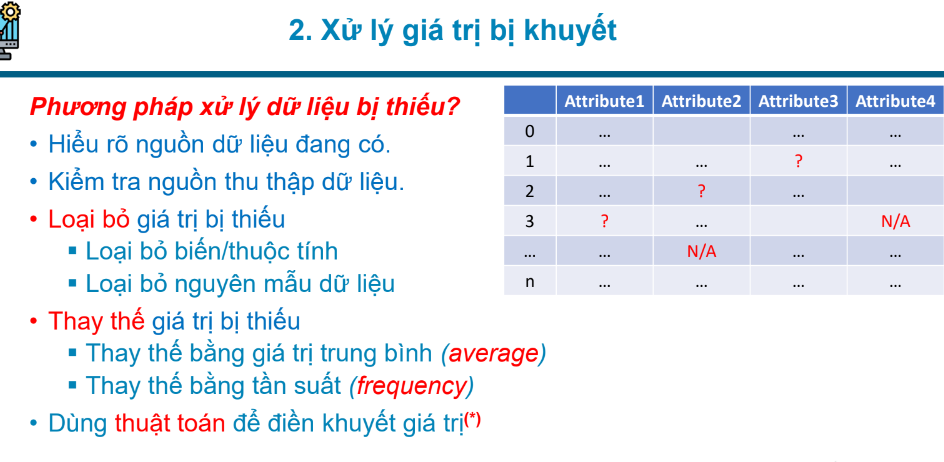

#**PROCESS**

## **Set up**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import matplotlib.ticker as mtick

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
import builtins
range = builtins.range  # Get back the original method

### Create_data_function

In [ ]:
transfer_sum = lambda array, sum_target: np.array([(i/sum(array)*sum_target) for i in array])
add_number = lambda array, _add: np.array([i + _add for i in array])
oder_mean = lambda array, mean_target: transfer_sum(array=array, sum_target = mean_target*len(array))

In [ ]:
def median_even_greater(_array, median_target):
  _array = np.array(sorted(_array))
  num = len(_array)

  id_median_target = np.where(_array >= median_target)[0][0]
  _current_median = _array[id_median_target]
  _array[id_median_target] = median_target*2 - _array[id_median_target-1]
  _range = _current_median - _array[id_median_target]

  x = _array[id_median_target] - _array[num//2-1]
  _range += x*len(_array[num//2-1: id_median_target-1])
  _array[num//2-1: id_median_target-1] = add_number(_array[num//2-1: id_median_target-1], x)

  _array = np.array(sorted(_array))
  _array[:num//2-1] = transfer_sum(_array[:num//2-1], sum(_array[:num//2-1])- _range)

  return _array


In [ ]:
def median_even_less(_array, median_target):
  _array = np.array(sorted(_array))
  num = len(_array)

  id_median_target = np.where(_array > median_target)[0][0]
  _current_median = _array[id_median_target]
  _array[id_median_target] = median_target*2 - _array[id_median_target-1]
  _range = _current_median - _array[id_median_target]



  x = _array[id_median_target-1] - _array[num//2]
  _range += -1*x*len(_array[id_median_target+1:num//2+1])
  _array[id_median_target+1:num//2+1] = add_number(_array[id_median_target+1:num//2+1], x)

  _array = np.array(sorted(_array))
  _array[num//2+1:] = transfer_sum(_array[num//2+1:], sum(_array[num//2+1:])+ _range)

  return _array


In [ ]:
def median_odd_greater(_array, median_target):
  _array = np.array(sorted(_array))
  num = len(_array)

  try:
    id_median_target = np.where(_array == median_target)[0][0]
    _range = 0
  except:
    id_median_target = np.where(_array > median_target)[0][0]
    _range = median_target - _array[id_median_target]
    _array[id_median_target] = median_target

  x = _array[id_median_target] - _array[num//2]
  _range += x*len(_array[num//2: id_median_target])
  _array[num//2: id_median_target] = add_number(_array[num//2: id_median_target], x)

  _array = np.array(sorted(_array))
  _array[:num//2] = transfer_sum(_array[:num//2], sum(_array[:num//2])- _range)

  return _array


In [ ]:
def median_odd_less(_array, median_target):
  _array = np.array(sorted(_array))
  num = len(_array)

  try:
    id_median_target = np.where(_array == median_target)[0][0]
    _range = 0
  except:
    id_median_target = np.where(_array > median_target)[0][0]
    _range = median_target - _array[id_median_target]
    _array[id_median_target] = median_target

  x = _array[id_median_target] - _array[num//2]
  _range += x*len(_array[id_median_target:num//2])
  _array[id_median_target+1:num//2+1] = add_number(_array[id_median_target+1:num//2+1], x)

  _array = np.array(sorted(_array))
  _array[num//2+1:] = transfer_sum(_array[num//2+1:], sum(_array[num//2+1:])- _range)

  return _array


In [ ]:
def create_array(mean_target, median_target,
                 num = 100, min_target = 0, max_target = 300):

  # create data_random
  data = [np.random.randint(min_target, max_target) for _ in range(num)]

  # mean
  data = oder_mean(array = data, mean_target= mean_target)

  current_median = np.median(data)

  if current_median == median_target:
    pass;
  elif num % 2 == 0 and current_median < median_target:
    data = median_even_greater(data, median_target)
  elif num % 2 == 0 and current_median > median_target:
    data = median_even_less(data, median_target)
  elif num % 2 == 1 and current_median < median_target:
    data = median_odd_greater(data, median_target)
  elif num % 2 == 1 and current_median > median_target:
    data = median_odd_less(data, median_target)


  return data



In [ ]:
def create_mode_array(mean_target, median_target, mode_target, num_mode, _min = 0, _max = 1000):
  num = num_mode*2+1
  mode_array = np.ones(num_mode)*mode_target
  sum_target = mean_target*num - sum(mode_array) - median_target
  if median_target < mode_target:
    extra_array = np.array([random.uniform(_min, median_target - num_mode) for _ in range(num_mode)])
    extra_array = transfer_sum(extra_array, sum_target)

    for i in np.where(extra_array>median_target)[0]:
      extra_array[i] = random.uniform(_min, median_target)

  else:
    extra_array = np.array([random.uniform(median_target + num_mode, _max) for _ in range(num_mode)])
    extra_array = transfer_sum(extra_array, sum_target)

    for i in np.where(extra_array<median_target)[0]:
      extra_array[i] = random.uniform(median_target, _max)



  _array = np.concatenate([mode_array, [median_target], extra_array])
  _range = mean_target*num - sum(_array)
  return _array, _range

In [ ]:
def create_data(mean_target, median_target, mode_target,
                num_initial = 100, min_initial = 0, max_initial = 300, _type = 'float'):
  data = create_array(mean_target=mean_target, median_target=median_target, num = num_initial)

  num_mode = stats.mode(data)[1] - np.count_nonzero(data == mode_target) + 1
  mode_array = create_mode_array(mean_target = median_target,
                                 median_target= median_target,
                                 mode_target = mode_target,
                                 num_mode = num_mode,
                                 _min = min_initial,
                                 _max = max_initial)

  if mode_array[1] < 0:
    data[:num_initial//2-1] = transfer_sum(data[:num_initial//2-1], sum(data[:num_initial//2-1]) + mode_target)
  elif mode_array [1] > 0:
    data[num_initial//2+1:] = transfer_sum(data[num_initial//2+1:], sum(data[num_initial//2+1:]) + mode_target)

  data = np.concatenate((data, mode_array[0]))

  if _type == 'int':
    data = np.ceil(data).astype(int)

  np.random.shuffle(data)


  print("mean:   ", np.mean(data))
  print("median: ", np.median(data))
  print("mode:   ", stats.mode(data))
  print("min:    ", np.min(data))
  print("max:    ", np.max(data))


  return data


### function for visuliazation

In [ ]:
def Bell_curve(df, name_column):
  mean = df[name_column].mean()
  std = df[name_column].std()
  median = df[name_column].median()
  mode = df[name_column].mode()
  min = df[name_column].min()
  max = df[name_column].max()

  # Ham mat do xac suat
  x = np.linspace(min, max, 100)
  pdf = stats.norm.pdf(x, mean, std)

  # Vẽ đồ thị chuông
  plt.figure(figsize=(8, 4))
  plt.plot(x, pdf, color='blue', linewidth=2, label='Bell Curve')
  plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean ({mean:.2f})')
  plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label=f'Median ({median:.2f})')
  plt.axvline(0.5*(min + max), color='pink', linewidth=1)
  if len(mode) > 1:
    for i in mode[:-1]:
      plt.axvline(i, color='y', linestyle='dashed', linewidth=1)
    plt.axvline(int(mode[-1:]), color='y', linestyle='dashed', linewidth=1, label='Mode')
  else:
    mode = float(mode)
    plt.axvline(mode, color='y', linestyle='dashed', linewidth=2, label=f'Mode ({mode:.2f})')

  plt.title('Đồ thị chuông (Bell Curve)')
  plt.xlabel(name_column)
  plt.ylabel('Mật độ xác suất')
  plt.grid(True)

  # Hiển thị đồ thị
  plt.legend()
  plt.show()


In [ ]:
def Bell_curve1(data, name_column = ''):
  mean = np.mean(data)
  std = np.std(data)
  median = np.median(data)
  mode = stats.mode(data)[0]
  min = np.min(data)
  max = np.max(data)

  # Ham mat do xac suat
  x = np.linspace(min, max, 100)
  pdf = stats.norm.pdf(x, mean, std)

  # Vẽ đồ thị chuông
  plt.figure(figsize=(8, 4))
  plt.plot(x, pdf, color='blue', linewidth=2, label='Bell Curve')
  plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean ({mean:.2f})')
  plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label=f'Median ({median:.2f})')
  plt.axvline(0.5*(min + max), color='pink', linewidth=1)
  plt.axvline(mode, color='y', linestyle='dashed', linewidth=2, label=f'Mode ({mode:.2f})')

  plt.title('Đồ thị chuông (Bell Curve)')
  plt.xlabel(name_column)
  plt.ylabel('Mật độ xác suất')
  plt.grid(True)

  # Hiển thị đồ thị
  plt.legend()
  plt.show()


In [ ]:
def fill_method_experiment(data, method, num_insert = 100):
  """
  method: filling missing value method (mean, median, mode)

  """
  mean = [np.mean(data)]
  median = [np.median(data)]
  mode = [stats.mode(data)[0]]

  for i in range(num_insert):
    data = np.concatenate((data, np.array([int(locals()[method][-1])])))

    mean.append(np.mean(data))
    median.append(np.median(data))
    mode.append(stats.mode(data)[0])


  return (mean, median, mode)




## **Analysis**

In [ ]:
name_data = ['Symmetry', 'Positive', 'Negative']
fill_method = ['mean', 'median', 'mode']

### **TH1: symmetry (mean = median = mode)**

In [ ]:
data1 = create_data(mean_target = 150, median_target = 150, mode_target =150, num_initial=150)

mean:    152.39233449061814
median:  150.0
mode:    ModeResult(mode=150.0, count=6)
min:     0.0
max:     315.98424823267067


**Lưu ý:** Biểu đồ sau chỉ nhằm thể hiện rõ chênh lệch giá trị mean, median, mode của bộ dữ liệu, không có ý nghĩa trực quan giá trị của toàn bộ dữ liệu

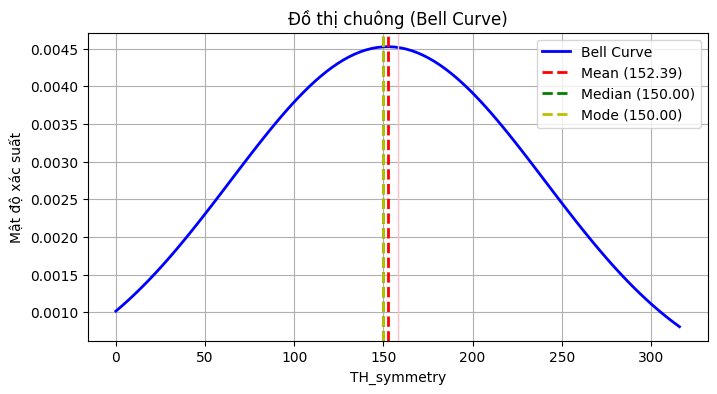

In [ ]:
#df1 = pd.DataFrame(data1, columns = ['TH_symmetry'])
Bell_curve1(data1, 'TH_symmetry')

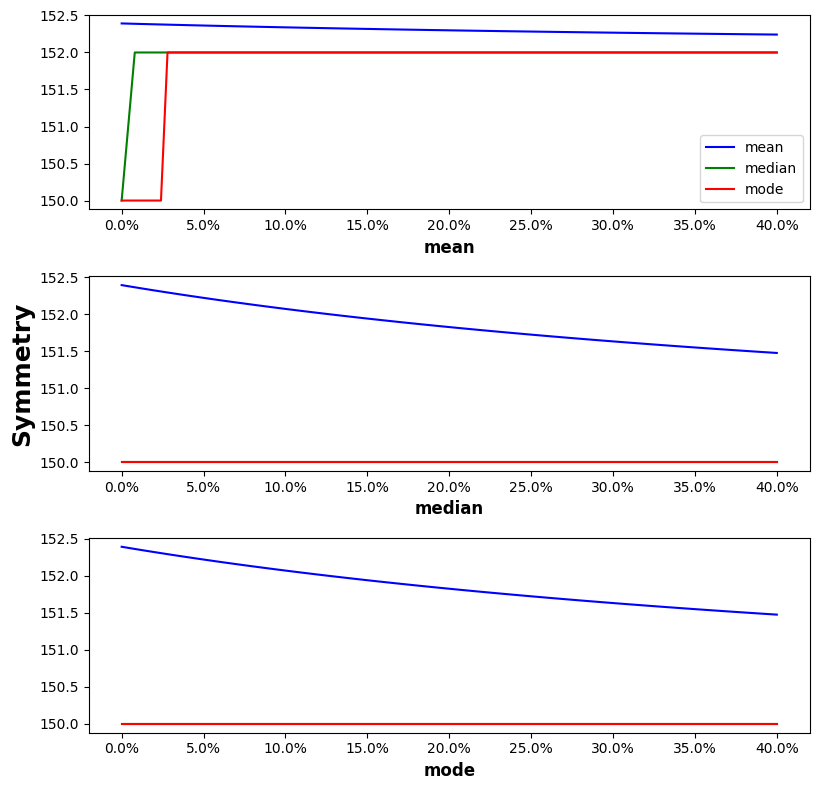

In [ ]:
n_cols, n_rows = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8,8))
fmt = '%.1f%%'
i = 0
for j in range(n_rows):# method

  _mean, _median, _mode = fill_method_experiment(data1, method= fill_method[j], num_insert = 100)

  x = np.arange(0,len(_mean))
  x = np.round(100*x/250,2)
  # Create a line chart
  #plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
  axs[j].plot(x, _mean, label='mean', color='b')
  axs[j].plot(x, _median, label='median', color='g')
  axs[j].plot(x, _mode, label='mode', color='r')

  xticks = mtick.FormatStrFormatter(fmt)
  axs[j].xaxis.set_major_formatter(xticks)


  axs[j].set_xlabel(fill_method[j], fontdict={'fontsize': 12, 'fontweight': 'bold'})

  plt.tight_layout()


axs[1].set_ylabel(name_data[i], fontdict={'fontsize': 18, 'fontweight': 'bold'})
axs[0].legend()
plt.show()

**Nhận xét:** Trong trường hợp này:
- Do các giá trị (mean, median, mode) như nhau cho nên thay missing value bằng giá trị mean, median hay mode đều không làm thay đổi quá nhiều đặc trưng bộ dữ liệu, đặc biệt là khi tỉ lệ missing value rất thấp.
- Khi tỉ lệ missing value cao hơn, có thể sử dụng giá trị median, mode để điền missing value
- Song, nếu tỉ lệ lớn hơn không nên sử dụng các phương pháp điền này.

### **TH2: positive (mode < median < mean)**

In [ ]:
data2 = create_data(mean_target = 200, median_target = 150, mode_target =120, num_initial=150, _type='int')

mean:    198.54716981132074
median:  153.0
mode:    ModeResult(mode=120, count=5)
min:     0
max:     419


**Lưu ý:** Biểu đồ sau chỉ nhằm thể hiện rõ chênh lệch giá trị mean, median, mode của bộ dữ liệu, không có ý nghĩa trực quan giá trị của toàn bộ dữ liệu

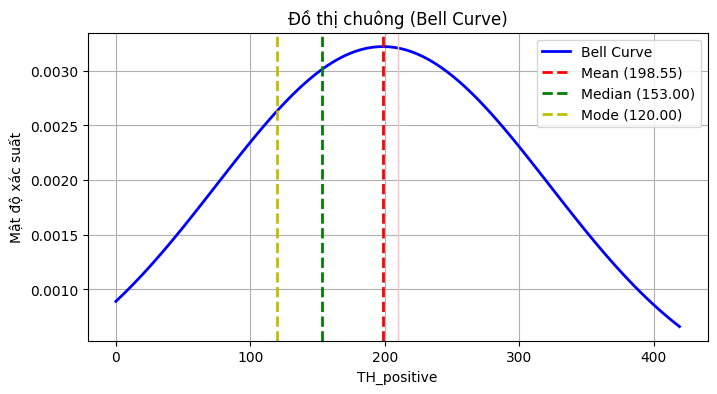

In [ ]:
#df2 = pd.DataFrame(data2, columns = ['TH_positive'])
Bell_curve1(data2, 'TH_positive')

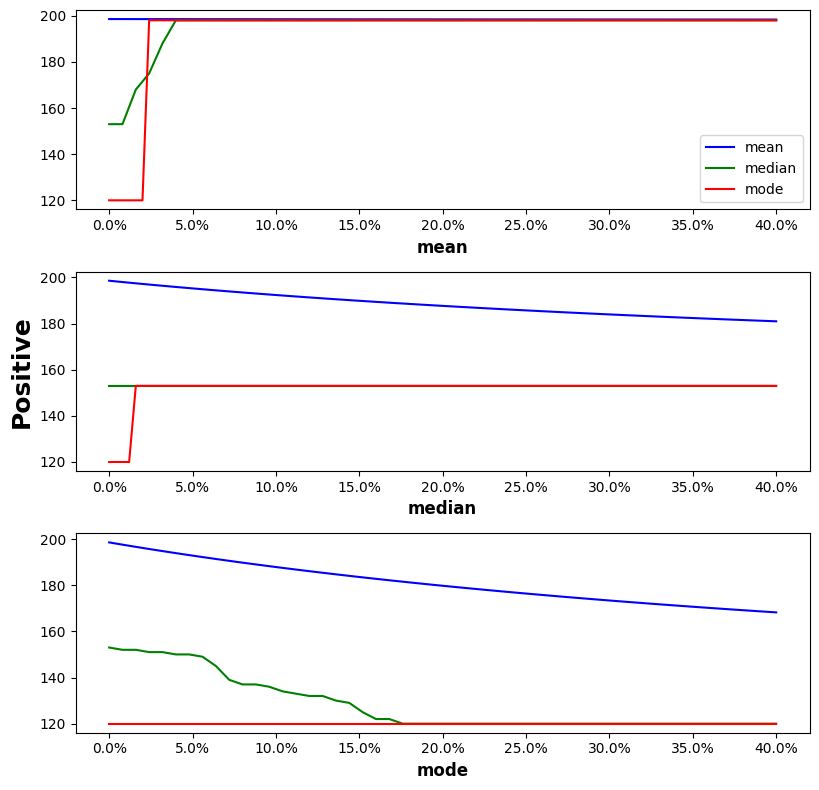

In [ ]:
n_cols, n_rows = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8,8))
fmt = '%.1f%%'
i = 1
for j in range(n_rows):# method

  _mean, _median, _mode = fill_method_experiment(data2, method= fill_method[j], num_insert = 100)

  x = np.arange(0,len(_mean))
  x = np.round(100*x/250,2)
  # Create a line chart
  #plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
  axs[j].plot(x, _mean, label='mean', color='b')
  axs[j].plot(x, _median, label='median', color='g')
  axs[j].plot(x, _mode, label='mode', color='r')

  xticks = mtick.FormatStrFormatter(fmt)
  axs[j].xaxis.set_major_formatter(xticks)


  axs[j].set_xlabel(fill_method[j], fontdict={'fontsize': 12, 'fontweight': 'bold'})

  plt.tight_layout()


axs[1].set_ylabel(name_data[i], fontdict={'fontsize': 18, 'fontweight': 'bold'})
axs[0].legend()
plt.show()

**Nhận xét:** Trong trường hợp này:
- Khi tỉ lệ missing value rất thấp (<1%), phương pháp điền giá trị mean không làm thay đổi bản chất dữ liệu quá nhiều, 2 phương pháp còn lại cũng không thay đổi bản chất dữ liệu quá nhiều.
- Nếu cần điền 1 lượng lớn missing value thì có thể điền bằng giá trị mode.
- Song khi mising value quá lớn, cả 3 phương pháp điền trên đều không phải sự lựa chọn khôn ngoan do làm thay đổi đặc trưng của bộ dữ liệu.

### **TH3: negative (mean < median < mode)**

In [ ]:
data3 = create_data(mean_target = 100, median_target = 130, mode_target =170, num_initial=150)

mean:    102.44478139435864
median:  130.0
mode:    ModeResult(mode=170.0, count=5)
min:     0.0
max:     183.71644144797887


**Lưu ý:** Biểu đồ sau chỉ nhằm thể hiện rõ chênh lệch giá trị mean, median, mode của bộ dữ liệu, không có ý nghĩa trực quan giá trị của toàn bộ dữ liệu

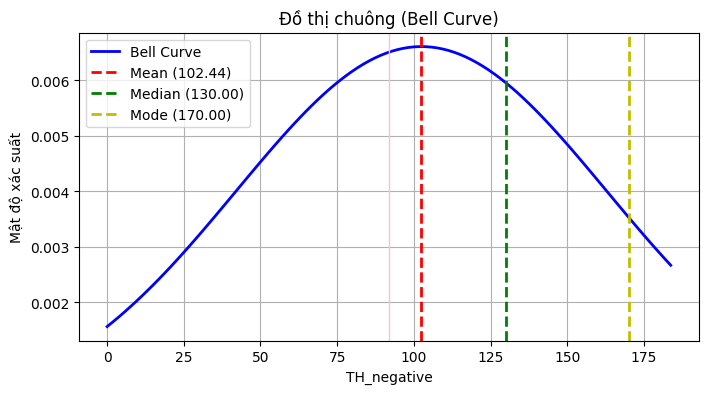

In [ ]:
# df3 = pd.DataFrame(data3, columns = ['TH_negative'])
Bell_curve1(data3, 'TH_negative')

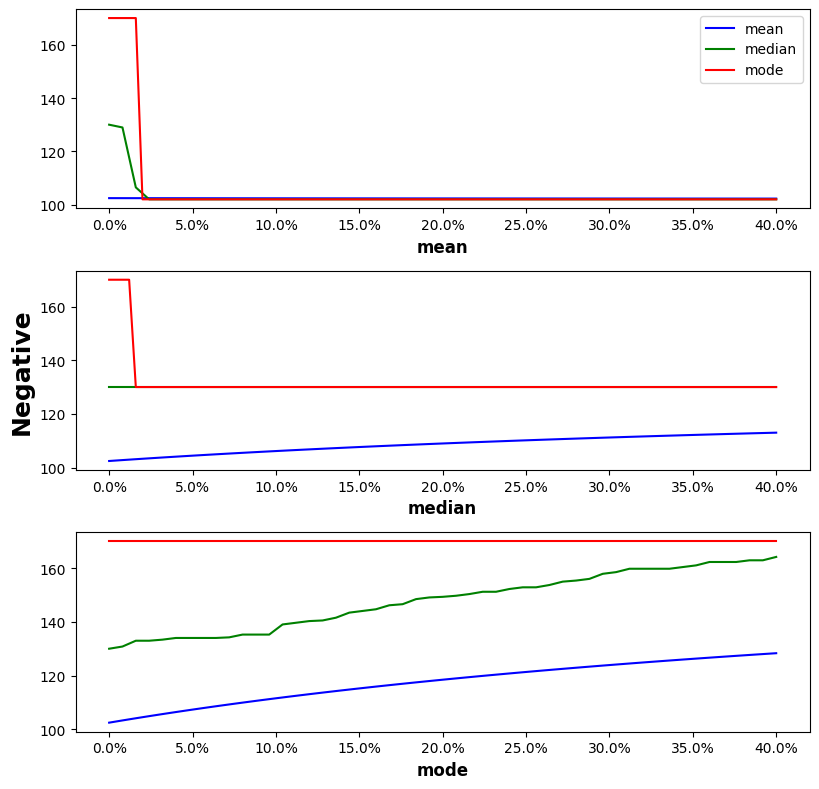

In [ ]:
n_cols, n_rows = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8,8))
fmt = '%.1f%%'
i = 2
for j in range(n_rows):# method

  _mean, _median, _mode = fill_method_experiment(data3, method= fill_method[j], num_insert = 100)

  x = np.arange(0,len(_mean))
  x = np.round(100*x/250,2)
  # Create a line chart
  #plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
  axs[j].plot(x, _mean, label='mean', color='b')
  axs[j].plot(x, _median, label='median', color='g')
  axs[j].plot(x, _mode, label='mode', color='r')

  xticks = mtick.FormatStrFormatter(fmt)
  axs[j].xaxis.set_major_formatter(xticks)


  axs[j].set_xlabel(fill_method[j], fontdict={'fontsize': 12, 'fontweight': 'bold'})

  plt.tight_layout()


axs[1].set_ylabel(name_data[i], fontdict={'fontsize': 18, 'fontweight': 'bold'})
axs[0].legend()
plt.show()

**Nhận xét:** Trong trường hợp này:
- Khi tỉ lệ missing value rất thấp, phương pháp điền giá trị mean không làm thay đổi bản chất dữ liệu quá nhiều, điền bằng giá trị median cũng không làm thay đổi bản chất dữ liệu quá nhiều.
- Nếu cần điền 1 lượng lớn missing value thì có thể điền giá trị mode.
- Song khi mising value quá lớn, cả 3 phương pháp đều bộc lộ khuyết điểm làm thay đổi đặc trưng dữ liệu.

## **Visualization**

In [ ]:
n_cols, n_rows = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8,8))
fmt = '%.1f%%'
i = 1
for j in range(n_rows):# method

  _mean, _median, _mode = fill_method_experiment(data1, method= fill_method[j], num_insert = 150)

  x = np.arange(0,len(_mean))
  x = np.round(100*x/200,2)
  # Create a line chart
  #plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
  axs[j].plot(x, _mean, label='mean', color='b')
  axs[j].plot(x, _median, label='median', color='g')
  axs[j].plot(x, _mode, label='mode', color='r')

  xticks = mtick.FormatStrFormatter(fmt)
  axs[j].xaxis.set_major_formatter(xticks)


  axs[j].set_xlabel(fill_method[j])

  plt.tight_layout()


axs[1].set_ylabel(name_data[1])
axs[0].legend()
plt.show()

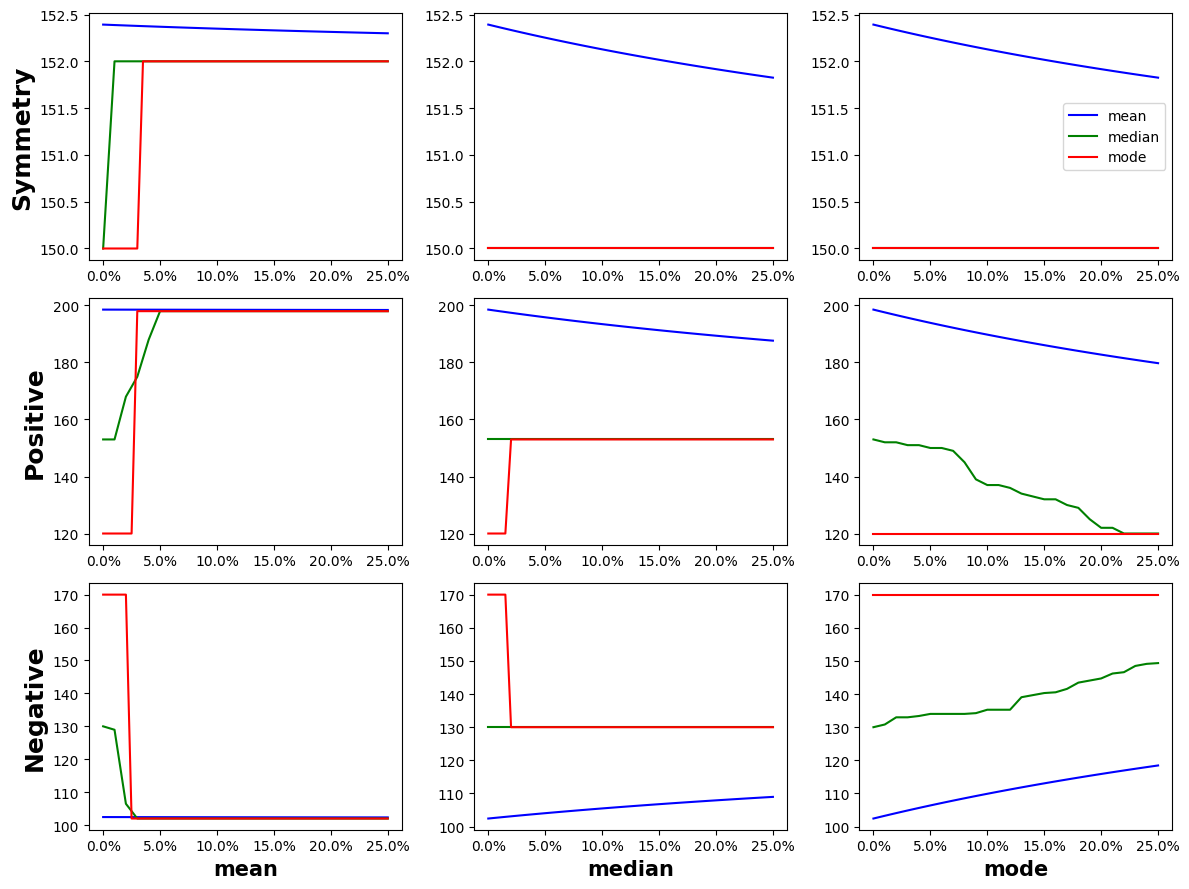

In [ ]:
data = [data1, data2, data3]
n_cols, n_rows = 3, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4* n_rows, 3 * n_cols))
fmt = '%.1f%%'
for i in range(n_rows): # data
  for j in range(n_cols):# method

    _mean, _median, _mode = fill_method_experiment(data[i], method= fill_method[j], num_insert = 50)

    x = np.arange(0,len(_mean))
    x = np.round(100*x/200,2)
    # Create a line chart
    #plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    axs[i][j].plot(x, _mean, label='mean', color='b')
    axs[i][j].plot(x, _median, label='median', color='g')
    axs[i][j].plot(x, _mode, label='mode', color='r')

    xticks = mtick.FormatStrFormatter(fmt)
    axs[i][j].xaxis.set_major_formatter(xticks)


    axs[2][j].set_xlabel(fill_method[j], fontdict={'fontsize': 15, 'fontweight': 'bold'})

    plt.tight_layout()

  axs[i][0].set_ylabel(name_data[i], fontdict={'fontsize': 18, 'fontweight': 'bold'})

axs[0][2].legend()
plt.show()

**Kết luận:**
- Khi lượng missing value cần điền ít (khoảng <2%), ta có thể sử dụng phương pháp điền bằng giá trị mean hoặc giá trị median
- Khi lượng missing value tương đối, có thể sử dụng phương pháp điền bằng giá trị mode để giảm nguy cơ thay đổi đặc trưng dữ liệu
- Khi lượng missing value lớn (khoẳng >10%), không nên sử dụng bất kì phương pháp nào trong cả 3.

Trên đây chỉ là thực nghiệm điền dữ liệu thiếu trên dãy số ngẫu nhiên độc lập. Trong trường hợp thực tế, khi điền missing value, ta cần ưu tiên mối quan hệ thuộc tính cần điền với các thuộc tính xung quanh, có thể kết hợp các phương pháp trên với những giá trị láng giềng xung quanh để điền missing value hiệu quả và tránh dữ liệu bias quá mức.